## Assignment 1.a Linear Regression
<br> 
In this notebook, a linear regression model is built to predict Facebook's stock value. Stock data including date, open, high, low, close and value columns are provided in the FB.csv file.
<br> 
The value of the "date" column starts with "2012-05-18" and ends with "2019-10-22". The "close" column contains the stock value at the closing. You must add an "index" column with value 0,1,2,3,... to this file. In other words,there should be an index value against each date as 0 for the date "2012-05-18", 1 for the date "2012-05-19", 2 for the "2012-05-20" and n (data size) for the "2019-10-22". The linear regression model is trained so that the "index" column is input and the "close" column is output.

## Data preperation

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns


In [ ]:
# Load the data (facebook stock data stored in FB.csv)
FB_Data = pd.read_csv("FB.csv", thousands=',')


# Print the data table.
FB_Data.head(5)


,date,open,high,low,close,volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


In [ ]:
#Add an integer value for each date such as 0,1,2,3,....
#you can add new column such as data['indexed_input']
#you can use "range(0, len(data))" for data['indexed_input'] 


indexed_input = np.array(range(len(FB_Data)))

FB_Data['indexed_input'] = indexed_input

print(FB_Data['indexed_input'])

# FB_Data['open'].head(4)

# len(FB_Data)



0          0
1          1
2          2
3          3
4          4
        ... 
1864    1864
1865    1865
1866    1866
1867    1867
1868    1868
Name: indexed_input, Length: 1869, dtype: int32


In [ ]:
# Since we only use "indexed_input" and "close" colums
# Drop columns other than "indexed_input" and "close"
# You may want to keep "date" as well
'''
The output can be following :
0 	2012-05-18 	38.2318 	0
1 	2012-05-21 	34.0300 	1
2 	2012-05-22 	31.0000 	2
'''
FB_Data.drop(['open', 'volume','high','low'], axis = 1)



,date,close,indexed_input
0,2012-05-18,38.2318,0
1,2012-05-21,34.0300,1
2,2012-05-22,31.0000,2
3,2012-05-23,32.0000,3
4,2012-05-24,33.0300,4
...,...,...,...
1864,2019-10-16,189.5500,1864
1865,2019-10-17,190.3900,1865
1866,2019-10-18,185.8500,1866
1867,2019-10-21,189.7600,1867


In [ ]:
# Split data set on training and test sets with proportions 80/20.
# It would be better to use function sample() which returns a random sample of items.

train_sample = FB_Data.sample(frac=0.8) 
test_sample  = FB_Data.drop(train_sample.index)

print(train_sample['indexed_input'].values)

print(len(test_sample))


[ 889 1825 1803 ...  263  775 1400]
374


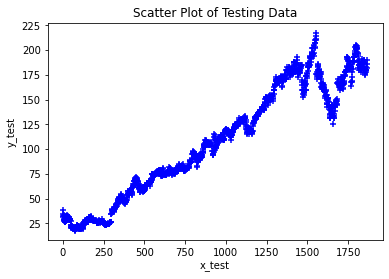

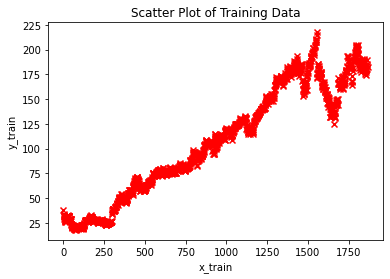

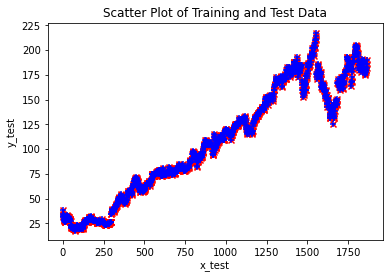

In [ ]:
# Plot training and testing datasets.
x_test = test_sample['indexed_input'].values
y_test = test_sample['close'].values
l = len(y_test)
plt.scatter(x_train,y_train,c='blue',marker = '+')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Scatter Plot of Testing Data')
plt.show()

x_train = train_sample['indexed_input'].values
y_train = train_sample['close'].values
l = len(y_train)
plt.scatter(x_train,y_train,c='red',marker = 'x')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Scatter Plot of Training Data')
plt.show()


#############Plotting training and test datasets together###################

x_train = train_sample['indexed_input'].values
y_train = train_sample['close'].values
l = len(y_train)
plt.scatter(x_train,y_train,c='red',marker = 'x')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Scatter Plot of Training and Test Data')


x_test = test_sample['indexed_input'].values
y_test = test_sample['close'].values
l = len(y_test)
plt.scatter(x_train,y_train,c='blue',marker = '+')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Scatter Plot of Training and Test Data')
plt.show()





## LinearRegression model from scrach
 


In [ ]:
# Define cost function
def linearRegressionCost(X,y,theta):
    
    m = len(y)
    h= X@theta
    cost = 1/(2*m)*(np.sum((h-y)**2))
    return cost
    



In [ ]:
# Define gradient decent function
def linearRegressionGradientDescent(X,y,theta,alpha,num_iter):
    J_history = []
    thetas = []
    m = len(y)
    for i in range(num_iter):
        h = X.dot(theta)
        grad = (1/m)*(X.T.dot(h-y))
        theta = theta - (alpha*grad)
        cost = linearRegressionCost(X,y,theta)
        thetas.append(theta)
        J_history.append(cost)
    
    return theta,thetas,J_history   

In [ ]:
# initlize the theta
# prepare x_train and y_train
# do not forget to append bias terms
# reshape and normolize your train and test dadaset

x_train = x_train/1000
y_train = y_train/1000


x_train = np.append(np.ones([x_train.shape[0],1]),x_train.reshape(x_train.shape[0],1),axis=1)
y_train = y_train.reshape(x_train.shape[0],1)

# print(y_train.shape)

theta = np.zeros([x_train.shape[1],1])



In [ ]:
# train your model and collect theta and cost function outputs for each iteration
theta,thetas,J_history = linearRegressionGradientDescent(x_train,y_train,theta,0.3,800)
# print(J_history)

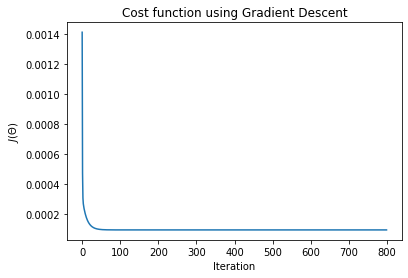

In [ ]:
#plot the cost function
plt.plot(J_history[0:800])
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()


In [ ]:
# predict the test datasets
def predcit(X,y,theta):
    
    prediction = X.dot(theta)
    return prediction


# x_test,X_mean, X_std = featureNormalization(x_test)
# y_test,y_mean, y_std = featureNormalization(y_test)


   

x_test = np.append(np.ones([x_test.shape[0],1]),x_test.reshape(x_test.shape[0],1),axis=1)
y_test = y_test.reshape(x_test.shape[0],1)
# print(x_test.shape)

In [ ]:
predictions = predcit(x_test,y_test,theta)
print(predictions.shape)

(374, 1)


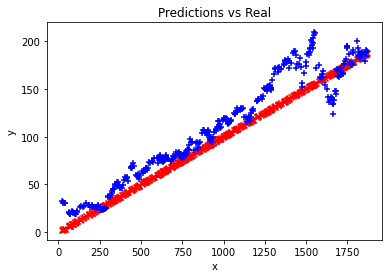

In [ ]:
#plot the test dataset real points and the predictions
predictions = predictions.reshape(1,374)
x_test = test_sample['indexed_input'].values
y_predictions = predictions
l = len(y_train)
plt.scatter(x_test,y_predictions,c='red',marker = 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Real')

# x_test = test_sample['indexed_input'].values
# y_test = test_sample['close'].values

plt.scatter(x_test,y_test,c='blue',marker = '+')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Real')
plt.show()



## Scikit-learn Linear Regression model


In [ ]:
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression

x_train = train_sample['indexed_input'].values
y_train = train_sample['close'].values

x_test = test_sample['indexed_input'].values
y_test = test_sample['close'].values

x_train = np.append(np.ones([x_train.shape[0],1]),x_train.reshape(x_train.shape[0],1),axis=1)
y_train = y_train.reshape(x_train.shape[0],1)

x_test = np.append(np.ones([x_test.shape[0],1]),x_test.reshape(x_test.shape[0],1),axis=1)
y_test = y_test.reshape(x_test.shape[0],1)


In [ ]:
# Use sklearn.linear_model.LinearRegression() as your model
# train the model and predict test dataset

model = LinearRegression()

model.fit(x_train,y_train)
precitions = model.predict(x_test)




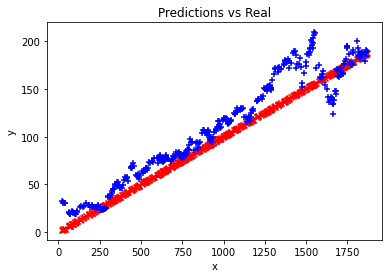

In [ ]:
#plot the real data points in test dataset and their predictions
predictions = predictions.reshape(1,374)
x_test = test_sample['indexed_input'].values
y_predictions = predictions
l = len(y_train)
plt.scatter(x_test,y_predictions,c='red',marker = 'x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Real')

# x_test = test_sample['indexed_input'].values
# y_test = test_sample['close'].values

plt.scatter(x_test,y_test,c='blue',marker = '+')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions vs Real')
plt.show()
